<h4>Cơ bản về Optical flow</h4>

Optical flow được sử dụng để ước tính chuyển động của các điểm hoặc đối tượng giữa hai khung hình liên tiếp trong một chuỗi video. Optical flow phân tích sự thay đổi cường độ của các điểm ảnh để xác định hướng và tốc độ của chuyển động. 

Optical flow dựa trên một số giả định cơ bản sau:
<ul>
    <li><b>Giả định độ sánh không đổi (Brightness Constancy Assumption):</b> Tức là cường độ sáng của một điểm ảnh không thay đổi theo thời gian. Nếu một điểm ảnh tại tọa độ (x,y) ở thời điểm t (khung hình 1) di chuyển tới vị trí $(x+\Delta x, y+\Delta y)$ ở thời điểm $t+\Delta t$, cường độ sáng tại điểm ảnh đó là không thay đổi: $I(x+\Delta x, y+\Delta y, t+\Delta t) = I(x,y,t)$</li>
    <li><b>Giả định sự nhỏ bé của chuyển động (Small Motion Assumption):</b> Chuyển động của các điểm ảnh giữa hai khung hình liên tiếp là nhỏ.</li>
    <li><b>Giả định tính liên tục của chuyển động (Spatial Coherence Assumption):</b> Chuyển động của các điểm ảnh lân cận là tương tự nhau.</li>
</ul>

Do giả định chuyển động của điểm ảnh giữa các khung hình là nhỏ, vì vậy ta áp dụng khai triển Taylor thu được như sau: <br>
$I(x+\Delta x, y+\Delta y, t+\Delta t) = I(x,y,t) + \frac{\partial I}{\partial x}\Delta x + \frac{\partial I}{\partial y}\Delta y + \frac{\partial I}{\partial t}\Delta t$ <br>
Khi đó ta có: $\frac{\partial I}{\partial x}\Delta x + \frac{\partial I}{\partial y}\Delta y + \frac{\partial I}{\partial t}\Delta t = 0 $ <br>
Thực hiện chia cả hai vế cho $\Delta t$ ta có phương trình: $\frac{\partial I}{\partial x}\frac{\Delta x}{\Delta t } + \frac{\partial I}{\partial y}\frac{\Delta y}{\Delta t } + \frac{\partial I}{\partial t}= 0 \Leftrightarrow  \frac{\partial I}{\partial x}\cdot V_{x} + \frac{\partial I}{\partial y}\cdot V_{y} + \frac{\partial I}{\partial t}= 0 $

Phương trình trên gọi là phương trình Optical flow. Vector $(V_{x}, V_{y})$ là vector thể hiện chuyển động của điểm ảnh trong Optical flow. Vấn đề của phương trình này là chỉ có 1 phương trình nhưng có tới hai ẩn, vì vậy nó gặp phải vấn đề "Không thể giải quyết"

<h4>Lucas-Kanade method</h4>

Phương pháp Lucas-Kanade giả định sự chuyển động của điểm ảnh giữa các khung hình là nhỏ và các hàng xóm lân cận có chuyển động giống với chuyển động của điểm ảnh đó. Vì vậy, phương pháp lấy vùng lân cận 3x3 xung quanh điểm ảnh, dẫn đến ta có 9 điểm ảnh có chuyển động giống nhau tức là có cùng vector chuyển động. Khi đó, ta xây dựng được 9 phương trình Optical flow cho 9 điểm ảnh để giải quyết tìm hai giá trị u và v của vector.

Ta có thể biểu diễn hệ phương trình dưới dạng như sau (với $q_{i}$ là các điểm lân cận của điểm (x,y)): <br>>ma$trix}trix}

$A = \begin{bmatrix}
I_{x}(q_{1}) & I_{y}(q_{1})\\
I_{x}(q_{2}) & I_{y}(q_{2})\\ 
... & ...\\ 
I_{x}(q_{n}) & I_{y}(q_{n}) 
\end{bmatrix}$ 

$v = \begin{bmatrix}
V_{x} \\ 
V_{y} 
\end{bmatrix}$ 

$B = \begin{bmatrix}
-I_{t}(q_{1})\\ 
-I_{t}(q_{2}) \\ 
.. \\ 
-I_{t}(q_{n}) 
\end{bmatrix}$

Nhiệm vụ là giải phương trình: $Ax = B$. Phương pháp bình phương tối thiểu được sử dụng bằng cách nhân cả hai vế với $A^{T}$, khi đó ta thu được phương trình $ A^{T}Ax = A^{T}B$ với $A^{T}A$ là một ma trận 2x2 và vế phải trở thành ma trận 2x1

Kết quả thu được công thức tính vector chuyển động như sau: $v = (A^{T}A)^{-1}A^{T}B$ hay <br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7d94a7e72c2c1f8bda30c925e57d543cb4d48145" />

Vấn đề tiếp theo là giả định các chuyển động là nhỏ để có thể triển khai Taylor, nếu như chuyển động lớn sẽ dẫn đến lỗi không chính xác. Để giải quyết vấn đề này, cải thiện phương pháp Lucas-Kanade thành phương pháp Pyramid Lucas-Kanade. Các bước của phương pháp kim tự tháp được thực hiện như sau: <br>
<ul>
    <li>Xây dựng pyramid: Tạo một loạt các phiên bản giảm độ phân giải của ảnh gốc. Ví dụ, giảm kích thước ảnh bằng cách chia đôi chiều rộng và chiều cao nhiều lần để tạo thành các mức độ phân giải khác nhau (level 0 là ảnh gốc, level 1 là ảnh giảm một nửa, v.v.). </li>
    <li>Ước tính optical flow ở mức thấp nhất: Bắt đầu từ mức độ phân giải thấp nhất (ảnh nhỏ nhất), ước tính optical flow sử dụng phương pháp Lucas-Kanade.</li>
    <li>Tiến tới mức cao hơn: Kết quả optical flow ở mức thấp nhất được mở rộng lên mức độ phân giải cao hơn (ảnh lớn hơn) và sử dụng như là một giá trị khởi đầu cho việc ước tính optical flow ở mức này. Điều này giúp bắt đầu ước tính chuyển động lớn ở mức thô và tinh chỉnh dần khi lên các mức cao hơn.</li>
    <li>Lặp lại quá trình: Lặp lại quá trình này cho đến khi đạt đến mức độ phân giải cao nhất (ảnh gốc).</li>
</ul>

<h4>Optical flow trong OpenCV</h4>

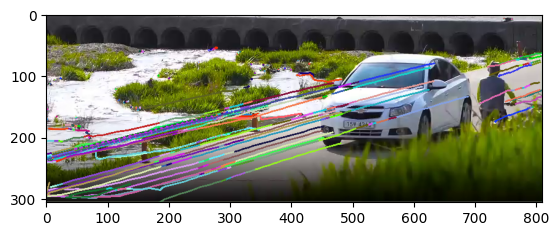

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Open the video file
cap = cv2.VideoCapture('optical_flow.mp4')

# Parameters for ShiTomasi corner detection
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)

# Parameters for Lucas-Kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Generate random colors for drawing tracks
color = np.random.randint(0, 255, (100, 3))

# Take the first frame and find corners in it
ret, old_frame = cap.read()
if not ret:
    print("Failed to capture video")
    exit()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert current frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Lucas-Kanade method
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points (where st=1)
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Draw tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
        cv2.line(old_frame, (a, b), (c, d), color[i].tolist(), 2)
        # cv2.circle(old_frame, (a, b), 5, color[i].tolist(), -1)

    # Overlay the tracks on the original frame
    img = cv2.add(frame, mask)

    # Display the resulting frame
    cv2.imshow('frame', img)
    
    # Exit if ESC is pressed
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Update previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

# Release video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))

<h4>Dense Optical Flow in OpenCV</h4>

Phương pháp Lucas-Kanade tính toán optical flow của các điểm thưa thớt (như các điểm thu được bằng Shi-Tomasi Corner Detector...). OpenCv cung cấp một thuật toán hỗ trợ tính dense optical flow (tính optical flow cho tất cả các điểm trong khung) --> Thuật toán Gunner Farneback.

In [ ]:
import cv2
import numpy as np

# Open the video file
cap = cv2.VideoCapture("optical_flow_full.mp4")

# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to capture video")
    exit()

# Convert the first frame to grayscale
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Initialize the HSV image for visualization
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255  # Set the saturation to maximum

while True:
    # Capture the next frame
    ret, frame2 = cap.read()
    if not ret:
        break

    # Convert the next frame to grayscale
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Calculate the optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute the magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Set hue according to the optical flow direction
    hsv[..., 0] = ang * 180 / np.pi / 2
    
    # Set value according to the optical flow magnitude
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert HSV image to BGR for display
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Display the frame
    cv2.imshow('Optical Flow', rgb)
    
    # Check for key presses
    k = cv2.waitKey(30) & 0xff
    if k == 27:  # ESC key to exit
        break
    elif k == ord('s'):  # 's' key to save the current frame and the optical flow visualization
        cv2.imwrite('opticalfb.png', frame2)
        cv2.imwrite('opticalhsv.png', rgb)

    # Update the previous frame
    prvs = next

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()